In [1]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data/accepted_2007_to_2018Q4.csv')

#Loan_Status is the target column.
print('TARGET FEATURE: loan_status')
print(df['loan_status'].value_counts())

#Since the model is about predicting whether a certain loan will be repayed or not
#Therefore we only need cases where the loan is
# - Fully paid
# - Charged off (not repayed)
df = df[df['loan_status'].isin(['Fully Paid','Charged Off'])]
df

TARGET FEATURE: loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,89905081,NaN,18000.0,18000.0,18000.0,60 months,9.49,377.95,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260690,88948836,NaN,29400.0,29400.0,29400.0,60 months,13.99,683.94,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260691,89996426,NaN,32000.0,32000.0,32000.0,60 months,14.49,752.74,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260692,90006534,NaN,16000.0,16000.0,16000.0,60 months,12.79,362.34,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
print(f'The data has {df.shape[0]} ROWS and {df.shape[1]} COLUMNS before processing')

The data has 1345310 ROWS and 151 COLUMNS before processing


In [3]:
#there are two types of applications, individual and joint application.
#Some of the columns are specific to joint type applications
#filling the rest with some value like -1 allows us to keep them but it affects the data
#so, we separate them and work on them separately.
df['application_type'].value_counts()

Individual    1319510
Joint App       25800
Name: application_type, dtype: int64

In [4]:
df_ind = df[df['application_type'] == 'Individual']
print('Individual application count:',df_ind.shape[0])
df_joint = df[df['application_type'] == 'Joint App']
print('Joint application count:',df_joint.shape[0])

Individual application count: 1319510
Joint application count: 25800


# Application_type: Individual
## Preparing the data

In [5]:
df_ind['loan_status'].value_counts()

Fully Paid     1057295
Charged Off     262215
Name: loan_status, dtype: int64

#### i. Dropping  with more than 30% missing values

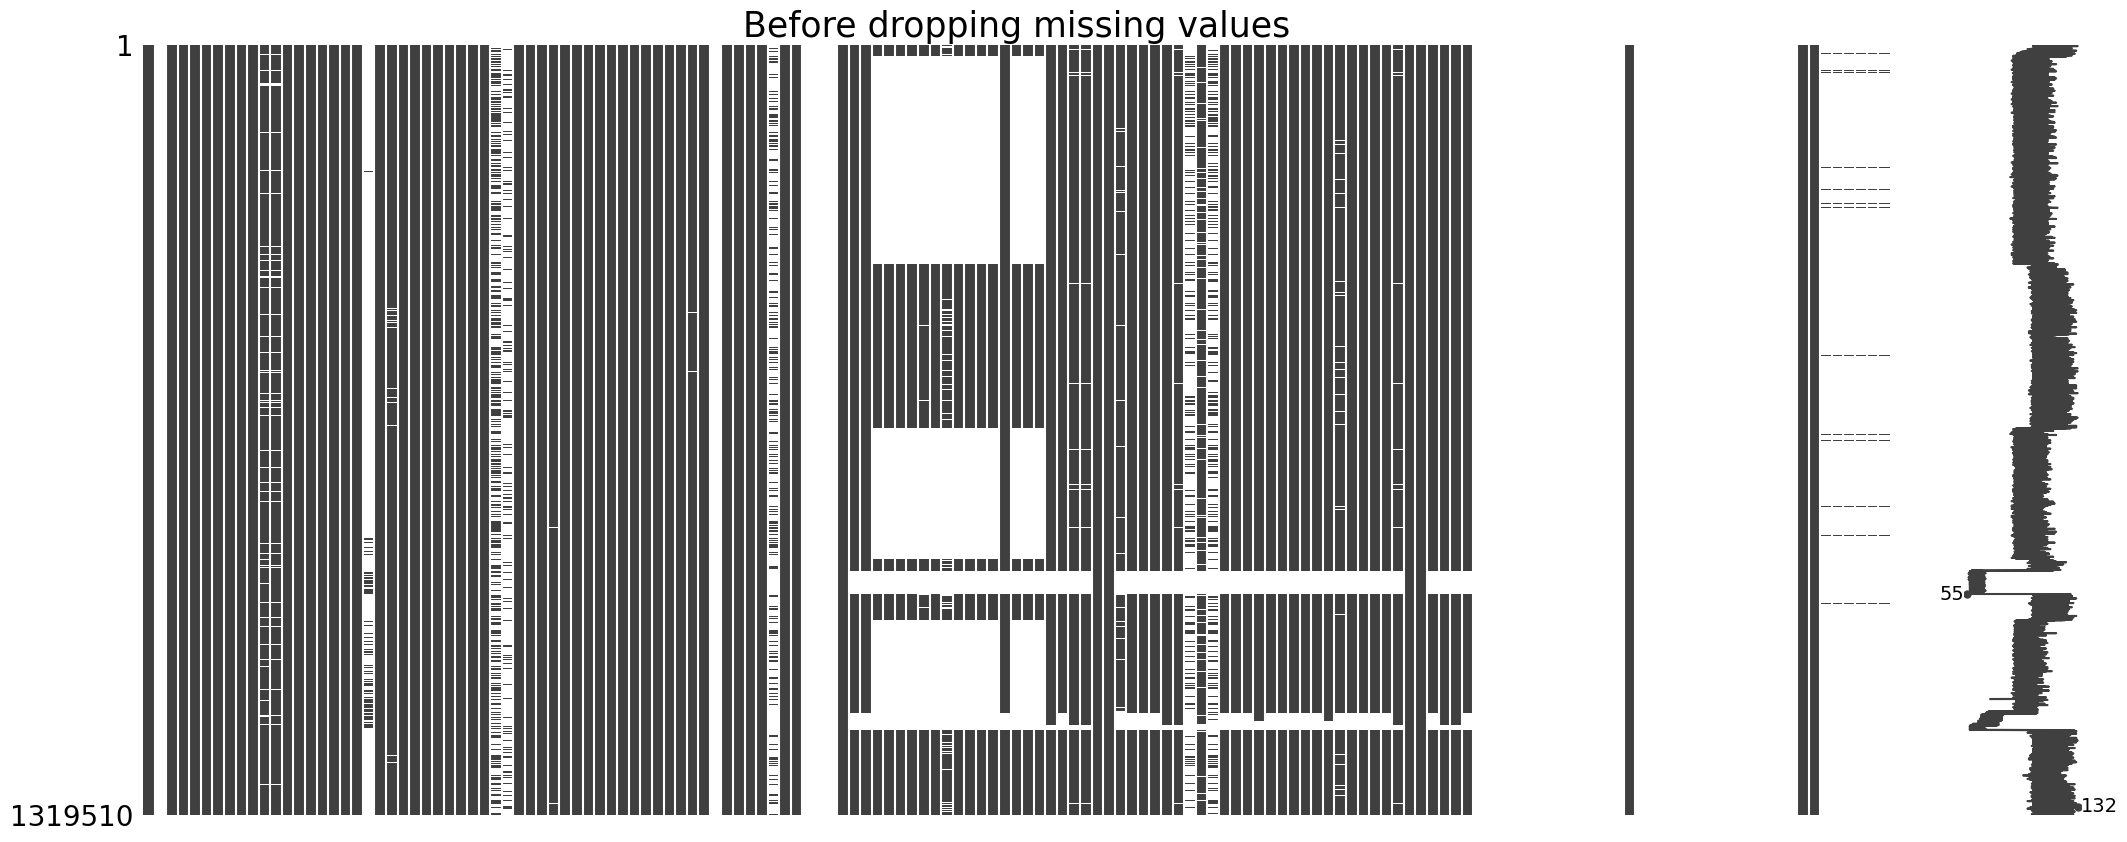

<Figure size 640x480 with 0 Axes>

In [6]:
#missing value using missingno


missingno.matrix(df_ind)
plt.title('Before dropping missing values', size = 25)
plt.show()
plt.savefig('figs/before_missing_value_filter.png')

In [7]:
#finding columns with more than 30% null values.
print('Gathering columns with more than 30% null values')
threshold = 0.3 * df_ind.shape[0]
drop_cols_ind = []
for i in df_ind.columns:
    if(df_ind[i].isna().sum() > threshold):
        print(f'- {i} has {df_ind[i].isna().sum() / df_ind.shape[0] * 100}% missing values')
        #df.drop([i], axis=1, inplace=True)
        drop_cols_ind.append(i)
print(f'Each of {len(drop_cols_ind)} above have more than 30% missing values ')
#print(f'The data has {df.shape[0]} ROWS and {df.shape[1]} COLUMNS after dropping columns having more than 30% missing values')

Gathering columns with more than 30% null values
- member_id has 100.0% missing values
- desc has 90.63803987843973% missing values
- mths_since_last_delinq has 50.42144432402937% missing values
- mths_since_last_record has 83.03074626186994% missing values
- next_pymnt_d has 100.0% missing values
- mths_since_last_major_derog has 73.65628149843502% missing values
- annual_inc_joint has 100.0% missing values
- dti_joint has 100.0% missing values
- verification_status_joint has 100.0% missing values
- open_acc_6m has 61.19226076346522% missing values
- open_act_il has 61.192184977756895% missing values
- open_il_12m has 61.192184977756895% missing values
- open_il_24m has 61.192184977756895% missing values
- mths_since_rcnt_il has 62.21226061189381% missing values
- total_bal_il has 61.192184977756895% missing values
- il_util has 66.37532114193905% missing values
- open_rv_12m has 61.192184977756895% missing values
- open_rv_24m has 61.192184977756895% missing values
- max_bal_bc has 6

In [8]:
#Dropping
ind_df = df_ind.drop(drop_cols_ind, axis=1).copy()
print(f'The number of individual applicant record data have {ind_df.shape[0]} ROWS and {ind_df.shape[1]} COLUMNS')

The number of individual applicant record data have 1319510 ROWS and 93 COLUMNS


#### ii. Dropping rows with missing values

Before : 1319510 rows X 93 columns
After : 1251983 rows X 93 columns


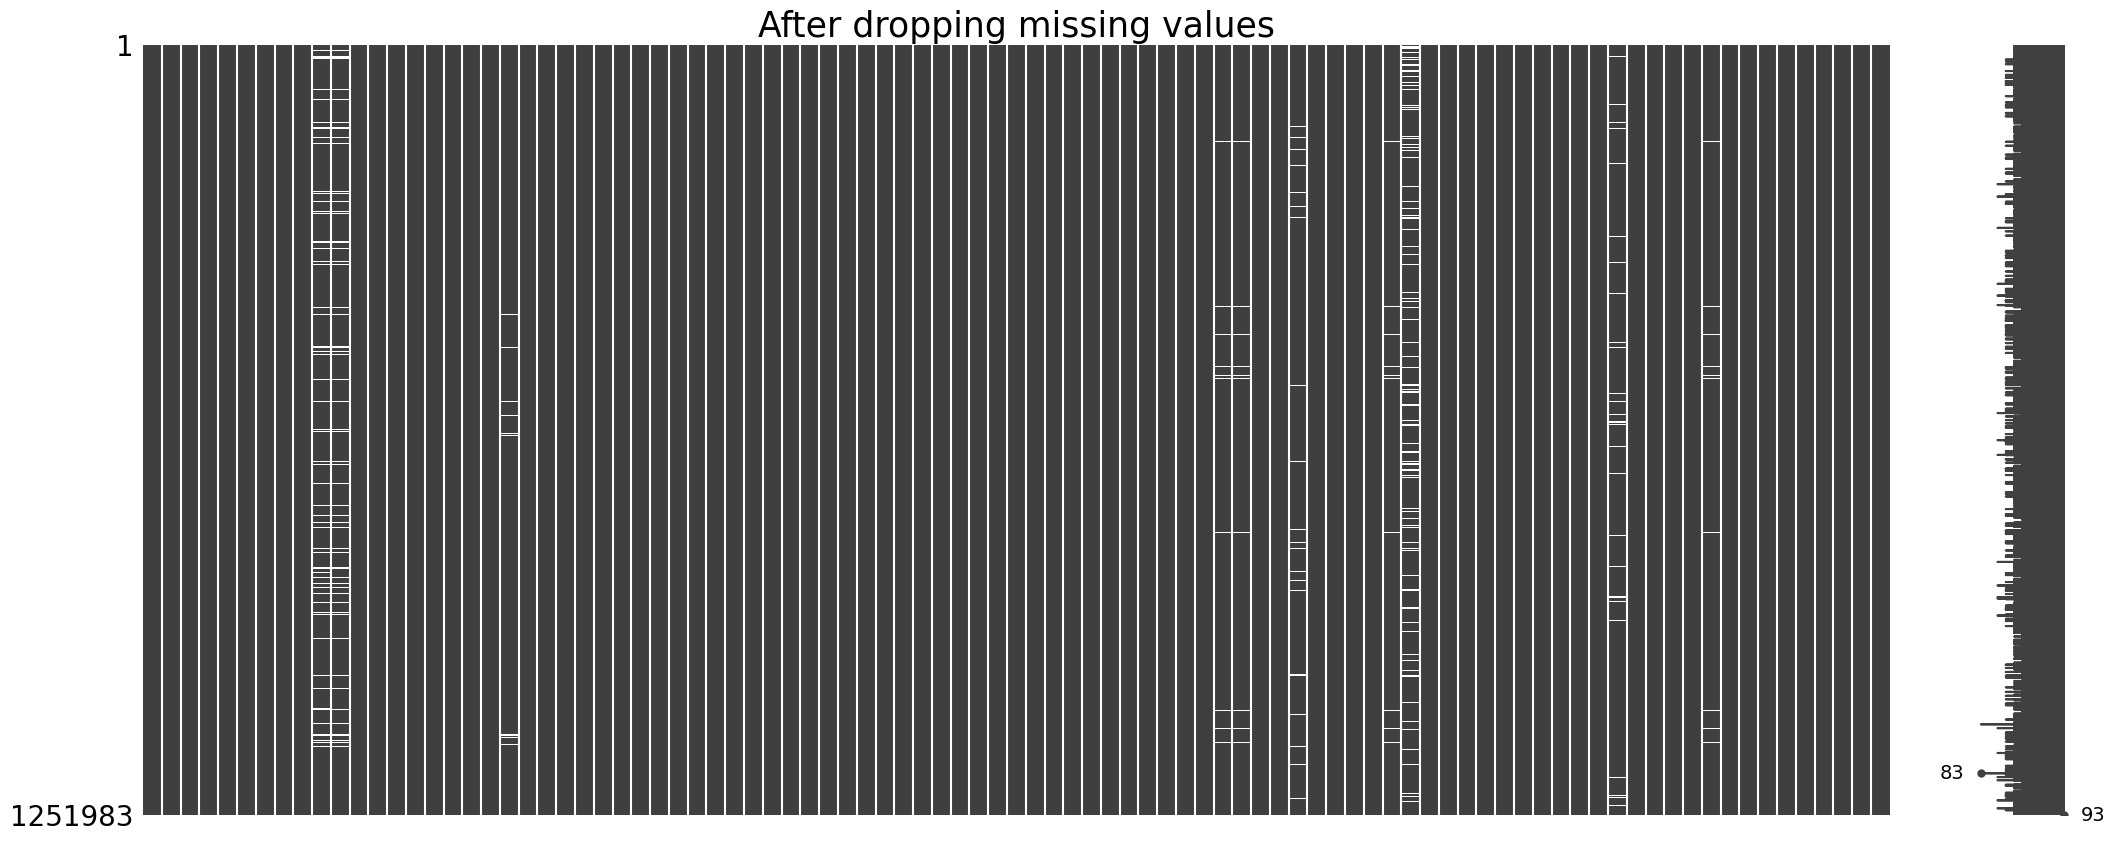

<Figure size 640x480 with 0 Axes>

In [9]:
#we can see a chunk of data missing if few of the columns. Lets set a threshold to drop those rows too.
#Rows are allows to have 20 missing values out of 93. If there are more than that, drop those rows.
print(f'Before : {ind_df.shape[0]} rows X {ind_df.shape[1]} columns')
ind_df = ind_df.dropna(thresh=73)
print(f'After : {ind_df.shape[0]} rows X {ind_df.shape[1]} columns')

missingno.matrix(ind_df)
plt.title('After dropping missing values', size = 25)
plt.show()
plt.savefig('figs/after_missing_value_filter.png')

#### iii. Missing value report for the rest of the columns

In [10]:
#Missing value report in percentages
mvr = ind_df.isna().sum() / ind_df.shape[0] *100
for i, j in mvr.items():
    print(f'{i} - {"{:.10f}".format(j)}')

id - 0.0000000000
loan_amnt - 0.0000000000
funded_amnt - 0.0000000000
funded_amnt_inv - 0.0000000000
term - 0.0000000000
int_rate - 0.0000000000
installment - 0.0000000000
grade - 0.0000000000
sub_grade - 0.0000000000
emp_title - 6.2123846730
emp_length - 5.8097434230
home_ownership - 0.0000000000
annual_inc - 0.0000000000
verification_status - 0.0000000000
issue_d - 0.0000000000
loan_status - 0.0000000000
pymnt_plan - 0.0000000000
url - 0.0000000000
purpose - 0.0000000000
title - 1.2808480626
zip_code - 0.0000798733
addr_state - 0.0000000000
dti - 0.0000000000
delinq_2yrs - 0.0000000000
earliest_cr_line - 0.0000000000
fico_range_low - 0.0000000000
fico_range_high - 0.0000000000
inq_last_6mths - 0.0000798733
open_acc - 0.0000000000
pub_rec - 0.0000000000
revol_bal - 0.0000000000
revol_util - 0.0583873743
total_acc - 0.0000000000
initial_list_status - 0.0000000000
out_prncp - 0.0000000000
out_prncp_inv - 0.0000000000
total_pymnt - 0.0000000000
total_pymnt_inv - 0.0000000000
total_rec_pr

#### iii. Preprocessing other columns

In [11]:
#id column is unique
if(len(ind_df['id'].unique()) == ind_df.shape[0]):
    print(f'- "id" is unique id column - making it index')

ind_df.set_index(['id'], inplace=True)

ind_df['term'] = ind_df['term'].str.strip()
#term is specified as months only, therefore create a new column 
ind_df['term_months'] = ind_df['term'].str.split(' ').str[0]
ind_df['term_months'] = ind_df['term_months'].astype('float')
ind_df.drop(['term'], axis=1, inplace=True)
print('- Created "term_months" and dropped "term"')

#changing emp_length to integer col in terms of years

ind_df.loc[ind_df['emp_length'] == '< 1 year','emp_length'] = '0+ years'
ind_df['emp_length'] = ind_df['emp_length'].str.extract('(\d+)').astype('float')
print('- Converted "emp_length" to float col')

#dropping emp_title as there are so many categories and its importance cannot be understood
ind_df.drop(['emp_title'], axis=1, inplace=True)
print('- Dropped "emp_title"')

#Dropping since its a date column.
#ind_df['issue_month'] = ind_df['issue_d'].str.split('-').str[0]
#ind_df['issue_year'] = ind_df['issue_d'].str.split('-').str[1]
ind_df.drop(['issue_d'], axis=1, inplace=True)
print('- Dropped "issue_d"')

#Dropping since its a date column.
#ind_df['earliest_cr_line_month'] = ind_df['earliest_cr_line'].str.split('-').str[0]
#ind_df['earliest_cr_line_year'] = ind_df['earliest_cr_line'].str.split('-').str[1]
ind_df.drop(['earliest_cr_line'], axis=1, inplace=True)
print('- Dropped "earliest_cr_line"')

#payment plan mostly "no" value
ind_df.drop(['pymnt_plan'], axis=1, inplace=True)
print('- Dropped "pymnt_plan"')

#dropping url column
ind_df.drop(['url'], axis=1, inplace=True)
print('- Dropped "url"')

#dropping title as it might not be important
ind_df.drop(['title'], axis=1, inplace=True)
print('- Dropped "title"')

#dropping zipcode as it is incomplete and might not carry enough information
ind_df.drop(['zip_code'], axis=1, inplace=True)
print('- Dropped "zip_code"')

#dropping out_prncp as all values are the same - 0
ind_df.drop(['out_prncp'], axis=1, inplace=True)
print('- Dropped "out_prncp"')

#dropping out_prncp_inv as all values are the same - 0
ind_df.drop(['out_prncp_inv'], axis=1, inplace=True)
print('- Dropped "out_prncp_inv"')

#dropping last_pymnt_d
#ind_df['last_pymnt_month'] = ind_df['last_pymnt_d'].str.split('-').str[0]
#ind_df['last_pymnt_year'] = ind_df['last_pymnt_d'].str.split('-').str[1]
ind_df.drop(['last_pymnt_d'], axis=1, inplace=True)
print('- Dropped "last_pymnt_d"')

#Dropping last_credit_pull_d
#ind_df['last_credit_pull_month'] = ind_df['last_credit_pull_d'].str.split('-').str[0]
#ind_df['last_credit_pull_year'] = ind_df['last_credit_pull_d'].str.split('-').str[1]
ind_df.drop(['last_credit_pull_d'], axis=1, inplace=True)
print('- Dropped "last_credit_pull_d"')

#dropping policy_code as all values are the same - 1
ind_df.drop(['policy_code'], axis=1, inplace=True)
print('- Dropped "policy_code"')

#dropping application_type as all values are the same - individual
ind_df.drop(['application_type'], axis=1, inplace=True)
print('- Dropped "application_type"')

#dropping hardship_flag as all values are the same - N
ind_df.drop(['hardship_flag'], axis=1, inplace=True)
print('- Dropped "hardship_flag"')

- "id" is unique id column - making it index
- Created "term_months" and dropped "term"
- Converted "emp_length" to float col
- Dropped "emp_title"
- Dropped "issue_d"
- Dropped "earliest_cr_line"
- Dropped "pymnt_plan"
- Dropped "url"
- Dropped "title"
- Dropped "zip_code"
- Dropped "out_prncp"
- Dropped "out_prncp_inv"
- Dropped "last_pymnt_d"
- Dropped "last_credit_pull_d"
- Dropped "policy_code"
- Dropped "application_type"
- Dropped "hardship_flag"


In [12]:
#more columns to be dropped
drop_cols = ind_df.filter(regex=r'^last_').columns.tolist()
drop_cols.extend(['collection_recovery_fee','recoveries', 'total_pymnt', 'total_pymnt_inv', 
                  'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp',
                 'total_pymnt','total_pymnt_inv','total_rec_prncp',
                 'total_rec_int','total_rec_late_fee','num_tl_120dpd_2m',
                 'num_tl_30dpd','debt_settlement_flag'])

print('Dropping:')
for i in drop_cols:
    print(f'- {i}')

Dropping:
- last_pymnt_amnt
- last_fico_range_high
- last_fico_range_low
- collection_recovery_fee
- recoveries
- total_pymnt
- total_pymnt_inv
- total_rec_int
- total_rec_late_fee
- total_rec_prncp
- total_pymnt
- total_pymnt_inv
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- num_tl_120dpd_2m
- num_tl_30dpd
- debt_settlement_flag


In [13]:
ind_df.drop(drop_cols, axis = 1, inplace = True)

In [14]:
ind_df

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,term_months
id,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,3600.0,3600.0,13.99,123.03,C,C4,10.0,MORTGAGE,55000.0,...,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash,36.0
68355089,24700.0,24700.0,24700.0,11.99,820.28,C,C1,10.0,MORTGAGE,65000.0,...,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash,36.0
68476807,10400.0,10400.0,10400.0,22.45,289.91,F,F1,3.0,MORTGAGE,104433.0,...,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash,60.0
68426831,11950.0,11950.0,11950.0,13.44,405.18,C,C3,4.0,RENT,34000.0,...,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash,36.0
68476668,20000.0,20000.0,20000.0,9.17,637.58,B,B2,10.0,MORTGAGE,180000.0,...,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0,Cash,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89905081,18000.0,18000.0,18000.0,9.49,377.95,B,B2,5.0,OWN,130000.0,...,100.0,33.3,0.0,0.0,275356.0,54349.0,13100.0,77756.0,Cash,60.0
88948836,29400.0,29400.0,29400.0,13.99,683.94,C,C3,9.0,MORTGAGE,180792.0,...,100.0,42.9,0.0,0.0,719056.0,148305.0,56500.0,95702.0,Cash,60.0
89996426,32000.0,32000.0,32000.0,14.49,752.74,C,C4,3.0,MORTGAGE,157000.0,...,100.0,0.0,0.0,0.0,524379.0,122872.0,15800.0,23879.0,Cash,60.0


In [15]:
print(f'The dataframe has {ind_df.shape[0]} rows and {ind_df.shape[1]} columns')

The dataframe has 1251983 rows and 65 columns


In [16]:
print('Saving the data into new file...')
ind_df.to_csv('data/individual_application_information.csv')
print('Saved file.')

Saving the data into new file...
Saved file.
